<a href="https://colab.research.google.com/github/DatumLearning/Machine-Learning-Playlist/blob/main/logistic_reg_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Finding the missing
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.isnull().sum() / df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df.drop("Cabin" , axis = 1 , inplace = True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isnull().sum() / df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [ ]:
mean = df.Age.mean()

In [ ]:
df.Age.fillna(mean , inplace = True)

In [ ]:
df.isnull().sum() / df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.Embarked.fillna('S' , inplace = True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isnull().sum() / df.shape[0]

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.drop(["Name" , "PassengerId" , "Ticket"] , inplace = True , axis = 1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
gender = pd.get_dummies(df.Sex)

In [ ]:
df = df.join(gender)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [ ]:
pc = pd.get_dummies(df.Pclass , prefix = "pclass")

In [ ]:
pc

,pclass_1,pclass_2,pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [ ]:
df = df.join(pc)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,pclass_1,pclass_2,pclass_3
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [ ]:
em = pd.get_dummies(df.Embarked , prefix = "em")

In [ ]:
em

,em_C,em_Q,em_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
df = df.join(em)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,pclass_1,pclass_2,pclass_3,em_C,em_Q,em_S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,1,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1


In [ ]:
df.drop(["Sex" , "Pclass" , "Embarked"] , axis = 1 , inplace = True)

In [ ]:
df.head()

,Survived,Age,SibSp,Parch,Fare,female,male,pclass_1,pclass_2,pclass_3,em_C,em_Q,em_S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [ ]:
#dealing with missing values
#changing text or categories to ohe
#normalize or standardize

In [ ]:
sc_age = MinMaxScaler()

In [ ]:
df["new_age"] = sc_age.fit_transform(df.Age.values.reshape(-1 , 1))

In [ ]:
df.head()

,Survived,Age,SibSp,Parch,Fare,female,male,pclass_1,pclass_2,pclass_3,em_C,em_Q,em_S,new_age
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0.271174
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0.472229
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0.321438
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1,0.434531
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0.434531


In [ ]:
sc_fare = MinMaxScaler()

In [ ]:
df["new_fare"] = sc_fare.fit_transform(df.Fare.values.reshape(-1 , 1))

In [ ]:
df.head()

,Survived,Age,SibSp,Parch,Fare,female,male,pclass_1,pclass_2,pclass_3,em_C,em_Q,em_S,new_age,new_fare
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0.271174,0.014151
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0.472229,0.139136
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0.321438,0.015469
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1,0.434531,0.103644
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0.434531,0.015713


In [ ]:
df.drop(["Fare" , "Age"] , axis = 1 , inplace = True)

In [ ]:
df.head()

,Survived,SibSp,Parch,female,male,pclass_1,pclass_2,pclass_3,em_C,em_Q,em_S,new_age,new_fare
0,0,1,0,0,1,0,0,1,0,0,1,0.271174,0.014151
1,1,1,0,1,0,1,0,0,1,0,0,0.472229,0.139136
2,1,0,0,1,0,0,0,1,0,0,1,0.321438,0.015469
3,1,1,0,1,0,1,0,0,0,0,1,0.434531,0.103644
4,0,0,0,0,1,0,0,1,0,0,1,0.434531,0.015713


In [ ]:
X = df.drop("Survived" , axis= 1)
y = df.Survived

In [ ]:
X.head()

,SibSp,Parch,female,male,pclass_1,pclass_2,pclass_3,em_C,em_Q,em_S,new_age,new_fare
0,1,0,0,1,0,0,1,0,0,1,0.271174,0.014151
1,1,0,1,0,1,0,0,1,0,0,0.472229,0.139136
2,0,0,1,0,0,0,1,0,0,1,0.321438,0.015469
3,1,0,1,0,1,0,0,0,0,1,0.434531,0.103644
4,0,0,0,1,0,0,1,0,0,1,0.434531,0.015713


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
train_x , test_x , train_y , test_y = train_test_split(X , y , test_size = 0.2 , random_state = 1234)

In [ ]:
train_x.head()

,SibSp,Parch,female,male,pclass_1,pclass_2,pclass_3,em_C,em_Q,em_S,new_age,new_fare
125,1,0,0,1,0,0,1,1,0,0,0.145514,0.021942
305,1,2,0,1,1,0,0,0,0,1,0.006283,0.295806
631,0,0,0,1,0,0,1,0,0,1,0.635587,0.013769
643,0,0,0,1,0,0,1,0,0,1,0.367921,0.110272
808,0,0,0,1,0,1,0,0,0,1,0.484795,0.025374


In [ ]:
train_x.shape

(712, 12)

In [ ]:
train_y

125    1
305    1
631    0
643    1
808    0
      ..
204    1
53     1
294    0
723    0
815    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(train_x , train_y)

In [ ]:
preds = lr.predict(test_x)

In [ ]:
preds

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0])

In [ ]:
accuracy_score(test_y , preds)

0.8491620111731844

In [ ]:
confusion_matrix(test_y , preds)

array([[102,   7],
       [ 20,  50]])

In [ ]:
(102 + 50) / (102 + 7 + 20 + 50)

0.8491620111731844

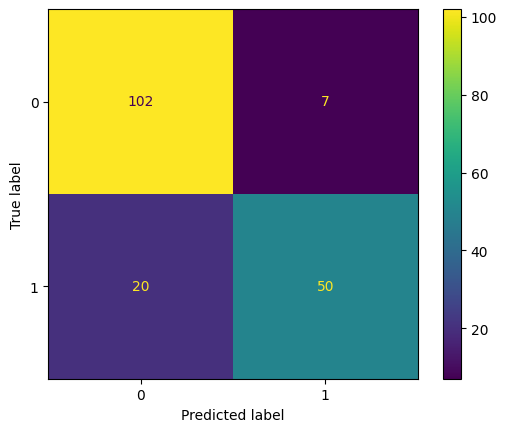

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_y , preds) , display_labels = lr.classes_)
disp.plot()